<a href="https://colab.research.google.com/github/Plluxury/XXX/blob/main/xxx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#импортируем необходимые нам библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

In [ ]:
# Загрузить данные
data = pd.read_csv('bank.csv')

In [ ]:
#смотрим вид нашей таблицы
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [ ]:
#просматриваем тип данных нашей таблицы
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   int64 
dtypes: int64(8), object(9)
memory usage: 600.6+ KB


In [ ]:
#удаляем столбцы, которые мы не сможем преобразовать в числовые значения
data = data.drop(['job','marital','education','contact','month','poutcome'], axis=1)

In [ ]:
#далее просматриваем какие столбцы остались
data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,30,no,1787,no,no,19,79,1,-1,0,0
1,33,no,4789,yes,yes,11,220,1,339,4,0
2,35,no,1350,yes,no,16,185,1,330,1,0
3,30,no,1476,yes,yes,3,199,4,-1,0,0
4,59,no,0,yes,no,5,226,1,-1,0,0


In [ ]:
#преобразуем yes и no в 1 и 0
data['default'] = data.default.map(dict(yes=1,no=0))

In [ ]:
data['housing'] = data.housing.map(dict(yes=1,no=0))

In [ ]:
data['loan'] = data.loan.map(dict(yes=1,no=0))

In [ ]:
data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,30,0,1787,0,0,19,79,1,-1,0,0
1,33,0,4789,1,1,11,220,1,339,4,0
2,35,0,1350,1,0,16,185,1,330,1,0
3,30,0,1476,1,1,3,199,4,-1,0,0
4,59,0,0,1,0,5,226,1,-1,0,0


In [ ]:
#Импортируем библиотеку
from sklearn.model_selection import train_test_split

In [ ]:
#выбираем значение, которое мы будем предсказывать и выделяем его в отдельную переменную
training_value = data['y']
training_point = data.drop('y', axis = 1)

In [ ]:
#создаём модель по которой мы определим признаки важности
model = randomforest.fit(training_point,training_value)

In [ ]:
#определяем значимые столбцы
importances = model.feature_importances_
importances


array([0.14776442, 0.00425532, 0.16301967, 0.02635361, 0.01335864,
       0.12778663, 0.34712908, 0.05355785, 0.07783612, 0.03893866])

In [ ]:
#используем модель леса
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

In [ ]:
#Создаём объект, который отбирает признаки с важностью большей или равной порогу
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(randomforest,threshold=0.1)

In [ ]:
#Выполняем подгонку новой матрицы используя селектор
features_important = selector.fit_transform(training_point,training_value)

In [ ]:
#Делим нашу выборку на обучающую и тестовую
x_train, x_test, y_train, y_test=train_test_split(features_important, training_value, test_size=0.2)

In [ ]:
#обучаем нашу модель
model = randomforest.fit(x_train, y_train)

In [ ]:
#проверяем нашу модель
test_predictions_randomforest = randomforest.predict(x_test)

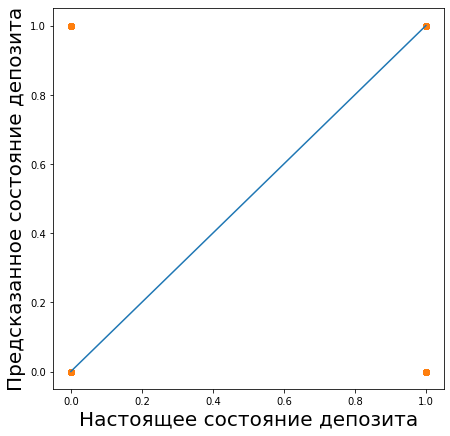

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test, test_predictions_randomforest)
plt.scatter(y_test, test_predictions_randomforest) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(y_test)], [0, max(test_predictions_randomforest)])  # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящее состояние депозита', fontsize=20)
plt.ylabel('Предсказанное состояние депозита', fontsize=20);